## Final Project Submission

Please fill out:
* Student name: James Brochhausen
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: Pending


In [22]:
#putting all my packages in
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import style
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
style.use('ggplot')

# Your code here - remember to use markdown cells for comments as well!

In [23]:
#showing all column names and displaying the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning Data

In [26]:
df.drop('id', axis=1, inplace=True)

In [27]:
# Converted date from object to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(1)
memory usage: 3.3+ MB


In [29]:
#There are '?' in sqft_basement I need to get rid of or replace with 0, exploring the data futher
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1852.0        1
508.0         1
3260.0        1
1798.0        1
1880.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [30]:
# '?' only represents ~2% of the data, so I'm going to remove all the rows which have a '?'
df = df[df.sqft_basement !='?']

In [31]:
#converting string to float for sqft_basement column so I can work with the data
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10)
memory usage: 3.4 MB


### Dealing with Null Values

In [32]:
#identifying null values

df.isnull().sum() / len(df)

# Can't remove the waterfront or yr_renovated rows because it's >18% of the data.

#Just fill with the most frequent, so maybe fill with just 0's for Nulls

date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110628
view             0.002885
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177553
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [33]:
#got rid of null values in view
df = df.dropna(axis=0, subset=['view'])
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2333
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [34]:
# Replacing Null values with the common number in waterfron and yr_renovatd
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [35]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dealing with outliers

#### Categorical and Numerical Data Frames

In [36]:
# # creating categorical df
df_cat = df[['yr_built','yr_renovated','waterfront','view','condition','grade']].copy()
df_cat.head()

# #Take a look at bathrooms as maybe moving to numerical
#Take a look at dtypes to look at data further, by splitting up data

,yr_built,yr_renovated,waterfront,view,condition,grade
0,1955,0.0,0.0,0.0,3,7
1,1951,1991.0,0.0,0.0,3,7
2,1933,0.0,0.0,0.0,3,6
3,1965,0.0,0.0,0.0,5,7
4,1987,0.0,0.0,0.0,3,8


In [37]:
# df_cat.describe()

In [57]:
# creating numerical df
df_num = df[['price','bedrooms','floors','sqft_living','sqft_lot','bathrooms','sqft_above',
             'sqft_basement','sqft_living15','sqft_lot15']].copy()

#### Removing outliers using z-score in numerical data

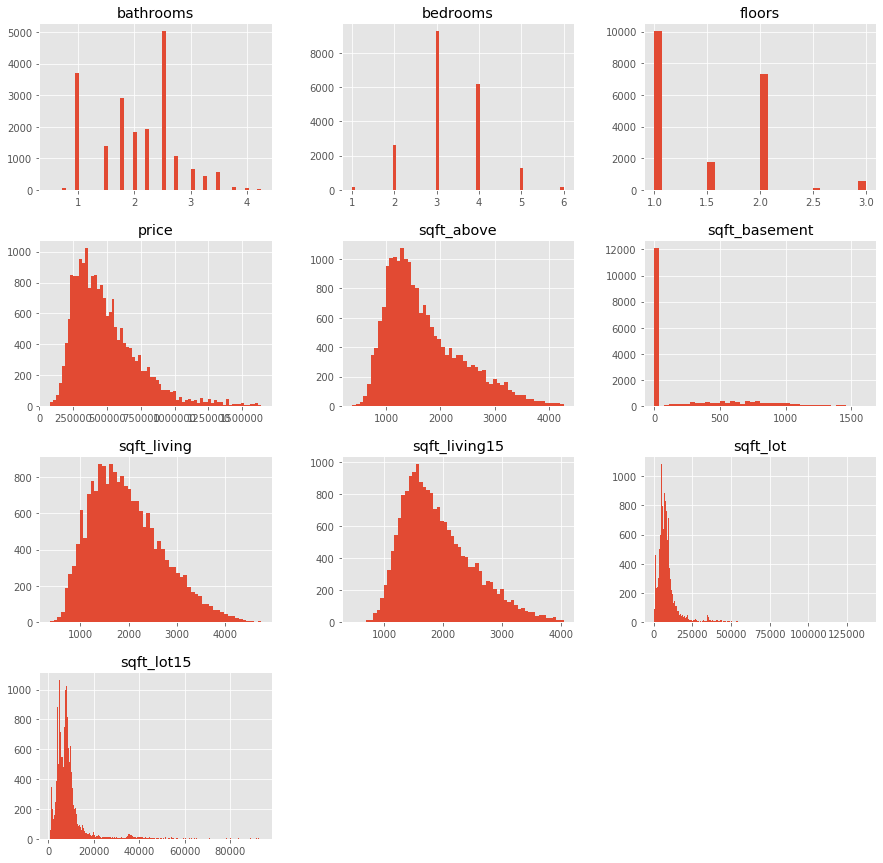

In [81]:
df_num.hist(bins='auto', figsize = (15,15));

In [82]:
z = np.abs(stats.zscore(df_num))

In [83]:
df_num = df_num[(z < 3).all(axis=1)]

In [84]:
df_num.head()

,price,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.00,1180,0.0,1340,5650
1,538000.0,3,2.0,2570,7242,2.25,2170,400.0,1690,7639
2,180000.0,2,1.0,770,10000,1.00,770,0.0,2720,8062
3,604000.0,4,1.0,1960,5000,3.00,1050,910.0,1360,5000
4,510000.0,3,1.0,1680,8080,2.00,1680,0.0,1800,7503


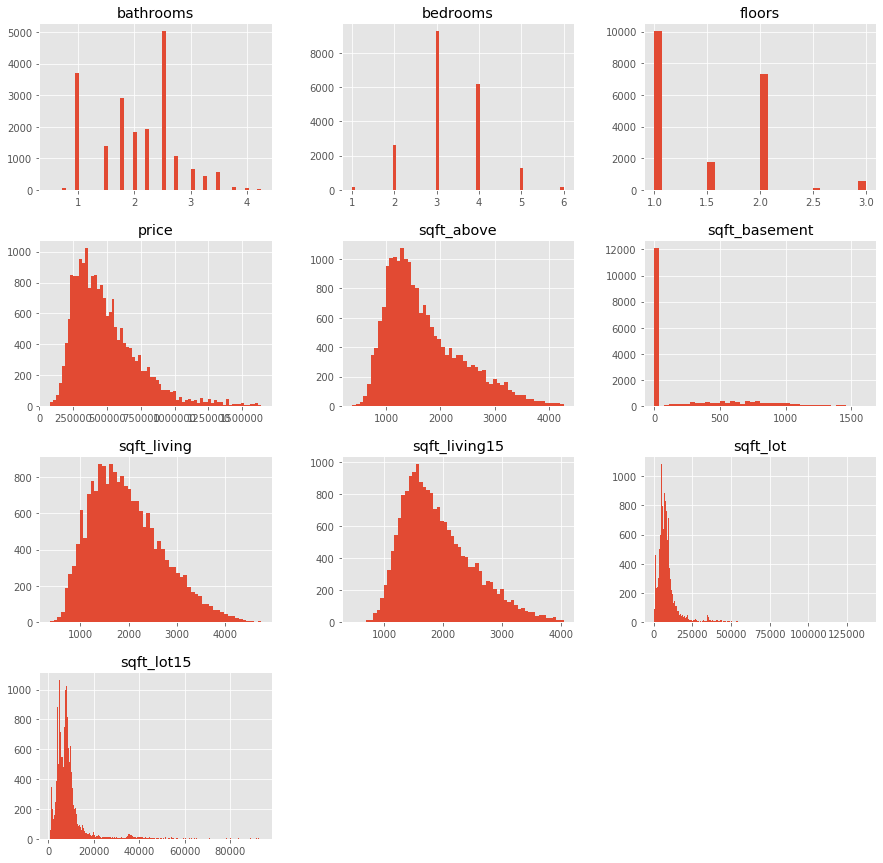

In [62]:
df_num.hist(bins='auto', figsize = (15,15));

In [66]:
# Seeing where I can draw the line on removing outliers, going to keep the first two bins
res = df_num.describe()
res

,price,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,1.976100e+04,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000
mean,4.933133e+05,3.322251,1.480062,1966.825819,10098.436010,2.048618,1700.355650,266.470169,1919.981681,9278.972673
std,2.452152e+05,0.854018,0.537823,748.101416,11855.170624,0.694573,706.640558,396.646891,605.275400,9196.172372
min,7.800000e+04,1.000000,1.000000,370.000000,520.000000,0.500000,370.000000,0.000000,460.000000,651.000000
25%,3.150000e+05,3.000000,1.000000,1400.000000,5000.000000,1.500000,1170.000000,0.000000,1470.000000,5000.000000
50%,4.391080e+05,3.000000,1.000000,1860.000000,7423.000000,2.000000,1520.000000,0.000000,1800.000000,7500.000000
75%,6.120000e+05,4.000000,2.000000,2440.000000,10035.000000,2.500000,2100.000000,520.000000,2280.000000,9690.000000
max,1.640000e+06,6.000000,3.000000,4750.000000,137214.000000,4.250000,4270.000000,1610.000000,4042.000000,93825.000000


#### Come back to

In [80]:
# IQR_df = (res.loc ['75%'] - res.loc['25%'])*1.5
# lower = res.loc['25%'] - IQR_df
# upper = res.loc['75%'] + IQR_df

# df_num.loc[((df_num > res.loc['25%'] - lower) & (df_num < res.loc['75%'] + upper)).all()]


# idx = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)

In [78]:
IQR_df

price            445500.0
bedrooms              1.5
floors                1.5
sqft_living        1560.0
sqft_lot           7552.5
bathrooms             1.5
sqft_above         1395.0
sqft_basement       780.0
sqft_living15      1215.0
sqft_lot15         7035.0
dtype: float64

#### THROW AWAY??

In [ ]:
# sns.boxplot(df['bedrooms'])

In [ ]:
# df['bedrooms'].astype(str).astype(float)
# df.info()

In [ ]:
# df['bedrooms'].unique()

In [ ]:
# df['bedrooms'].value_counts()

In [ ]:
# df = df[df.bedrooms < 7]
# df['bedrooms'].head()

In [ ]:
# sns.boxplot(df['bedrooms'])

In [ ]:
# Q1 = df_num.quantile(0.25)
# Q3 = df_num.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [89]:
# Using IQR Metod to remove outliers of the data
# idx = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = pd.concat([df_num, df_cat], axis=1)
df_clean = df_clean.dropna()
df_clean.isna().sum()

price            0
bedrooms         0
floors           0
sqft_living      0
sqft_lot         0
bathrooms        0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
yr_built         0
yr_renovated     0
waterfront       0
view             0
condition        0
grade            0
dtype: int64

## Exploring Data

In [ ]:
#taking a look at all of the data
#put this above the one hot encoding
fig, ax = plt.subplots(figsize = (20,20))
pd.plotting.scatter_matrix(df_clean, ax=ax);

In [90]:
df_clean.corr()

,price,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,yr_renovated,waterfront,view,condition,grade
price,1.000000,0.276455,0.262209,0.585947,0.042169,0.412641,0.477609,0.232094,0.521631,0.043102,0.012714,0.098825,0.073792,0.246479,0.055415,0.600005
bedrooms,0.276455,1.000000,0.164217,0.612608,0.145015,0.483303,0.490593,0.258003,0.404054,0.145863,0.190855,-0.006886,-0.030019,0.026157,0.023676,0.340212
floors,0.262209,0.164217,1.000000,0.351633,-0.212183,0.520654,0.537779,-0.301406,0.264315,-0.209295,0.515899,-0.002850,-0.006914,-0.010711,-0.275590,0.465628
sqft_living,0.585947,0.612608,0.351633,1.000000,0.222049,0.696586,0.844767,0.344058,0.731493,0.220977,0.349217,0.025249,0.002096,0.145421,-0.068949,0.686680
sqft_lot,0.042169,0.145015,-0.212183,0.222049,1.000000,0.009602,0.201569,0.051852,0.278003,0.854111,-0.013725,0.003830,0.060320,0.064021,0.074910,0.106086
bathrooms,0.412641,0.483303,0.520654,0.696586,0.009602,1.000000,0.612780,0.196981,0.516542,0.016319,0.559387,0.021595,-0.010933,0.074151,-0.139857,0.604390
sqft_above,0.477609,0.490593,0.537779,0.844767,0.201569,0.612780,1.000000,-0.211814,0.707305,0.207208,0.463648,-0.003291,-0.012657,0.050306,-0.176081,0.687215
sqft_basement,0.232094,0.258003,-0.301406,0.344058,0.051852,0.196981,-0.211814,1.000000,0.094879,0.039999,-0.175747,0.051886,0.026035,0.177314,0.183032,0.048285
sqft_living15,0.521631,0.404054,0.264315,0.731493,0.278003,0.516542,0.707305,0.094879,1.000000,0.305545,0.345317,-0.031829,0.017641,0.184329,-0.113189,0.646275
sqft_lot15,0.043102,0.145863,-0.209295,0.220977,0.854111,0.016319,0.207208,0.039999,0.305545,1.000000,0.011475,0.005282,0.073688,0.063082,0.082469,0.128288


In [ ]:
df_clean.hist(bins = 'auto', figsize = (15,15));

### Normalizing Data

#### Numerical Data

In [91]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['sqft_living','sqft_lot','bathrooms','sqft_above','sqft_basement','sqft_living15','sqft_lot15']:
    df_clean[feat] = norm_feat(df_clean[feat])
df_clean.describe()

,price,bedrooms,floors,sqft_living,sqft_lot,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,yr_renovated,waterfront,view,condition,grade
count,1.819800e+04,18198.000000,18198.000000,1.819800e+04,1.819800e+04,1.819800e+04,1.819800e+04,18198.000000,1.819800e+04,1.819800e+04,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000,18198.000000
mean,4.658901e+05,3.266568,1.470381,-9.995546e-17,1.249443e-17,3.123608e-16,-1.062027e-16,0.000000,1.967873e-16,2.498886e-17,1970.022365,59.666447,0.002308,0.152654,3.410595,7.466425
std,2.065667e+05,0.808602,0.539327,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,29.576101,339.921727,0.047987,0.601418,0.649315,0.977715
min,7.800000e+04,1.000000,1.000000,-2.227301e+00,-1.312849e+00,-2.235995e+00,-1.938570e+00,-0.666276,-2.498022e+00,-1.442147e+00,1900.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,3.086938e+05,3.000000,1.000000,-7.591092e-01,-5.583610e-01,-7.493890e-01,-7.465921e-01,-0.666276,-7.384684e-01,-5.688095e-01,1950.000000,0.000000,0.000000,0.000000,3.000000,7.000000
50%,4.250000e+05,3.000000,1.000000,-1.277867e-01,-1.619118e-01,-6.085952e-03,-2.575757e-01,-0.666276,-1.874971e-01,-1.017177e-01,1972.000000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,5.833750e+05,4.000000,2.000000,6.503549e-01,2.444829e-01,7.372171e-01,5.523578e-01,0.674396,5.945266e-01,2.958424e-01,1996.000000,0.000000,0.000000,0.000000,4.000000,8.000000
max,1.220000e+06,5.000000,3.000000,3.395874e+00,6.406078e+00,2.967126e+00,3.333639e+00,3.221674,3.313836e+00,5.827496e+00,2015.000000,2015.000000,1.000000,4.000000,5.000000,11.000000


#### Categorical Data

#### NEED HELP

In [103]:
#Move this LOWER
feats = ['yr_built','yr_renovated','waterfront','view','condition','grade']
# # df = df[feats]
# df = pd.get_dummies(df, drop_first=True, columns = feats)
# df.head()

In [104]:
x_cols = ['yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_above',
          'sqft_basement', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'grade', 'view']
outcome = 'price'

## Modeling Data

In [105]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
for col in feats:
    formula = formula.replace(col, 'C({})'.format(col))
formula

'price~C(yr_built)+sqft_living15+sqft_lot15+sqft_above+sqft_basement+sqft_living+bathrooms+bedrooms+floors+C(grade)+C(view)'

In [106]:

# formula = outcome + '~' + predictors
# formula = formula.replace('yr_built', 'C(yr_built)')

In [107]:
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
#Don't scale the ones you want to treat as categories before doing the formula

model = ols(formula=formula, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:30:28   Log-Likelihood:            -2.4050e+05
No. Observations:               18198   AIC:                         4.813e+05
Df Residuals:                   18063   BIC:                         4.823e+05
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.622e+05   1.35e+05      3.420      0.001    1.97e+05    7.27e+05
C(yr_built)[T.1901]  -1.63e+04   3.04e+04     -0.536      0.592   -7.59e+04    4.33e+04
C(yr_built)[T.1902] -2.274e+04   3.19e+04     -0.714      0.475   -8.52e+04    3.97e+04
C(yr_built)[T.1903] -4.912e+04   2.58e+04     -1.906      0.057   -9.96e+04    1396.700
C(yr_built)[T.1904]  1.362e+04   2.58e+04      0.528      0.597   -3.69e+04    6.42e+04
C(yr_built)[T.1905]  4620.3007   2.35e+04      0.196      0.844   -4.15e+04    5.07e+04
C(yr_built)[T.1906]  1.525e+04   2.16e+04      0.707      0.480   -2.71e+04    5.76e+04
C(yr_built)[T.1907] -3588.5286   2.35e+04     -0.153      0.879   -4.97e+04    4.25e+04
C(yr_built)[T.1908] -5.967e+04   2.17e+04     -2.755      0.006   -1.02e+05   -1.72e+04
C(yr_built)[T.1909] -5998.0507   2.13e+04     -0.282      0.778   -4.77e+04    3.57e+04
C(yr_built)[T.1910] -1.707e+04   1.96e+04     -0.869      0.385   -5.56e+04    2.14e+04
C(yr_built)[T.1911] -9980.6916   2.31e+04     -0.432      0.666   -5.52e+04    3.53e+04
C(yr_built)[T.1912] -1.533e+04   2.22e+04     -0.692      0.489   -5.88e+04    2.81e+04
C(yr_built)[T.1913] -3.387e+04   2.51e+04     -1.352      0.176    -8.3e+04    1.52e+04
C(yr_built)[T.1914] -1.901e+04   2.47e+04     -0.769      0.442   -6.75e+04    2.94e+04
C(yr_built)[T.1915] -1.564e+04   2.36e+04     -0.662      0.508    -6.2e+04    3.07e+04
C(yr_built)[T.1916] -1.529e+04   2.23e+04     -0.685      0.494   -5.91e+04    2.85e+04
C(yr_built)[T.1917] -2.375e+04   2.47e+04     -0.961      0.337   -7.22e+04    2.47e+04
C(yr_built)[T.1918] -5.636e+04   2.01e+04     -2.798      0.005   -9.58e+04   -1.69e+04
C(yr_built)[T.1919] -7492.4819   2.17e+04     -0.346      0.729   -4.99e+04     3.5e+04
C(yr_built)[T.1920] -4.164e+04   2.09e+04     -1.994      0.046   -8.26e+04    -706.408
C(yr_built)[T.1921]  -1.27e+04   2.27e+04     -0.560      0.576   -5.72e+04    3.18e+04
C(yr_built)[T.1922]  -2.26e+04   2.12e+04     -1.068      0.286   -6.41e+04    1.89e+04
C(yr_built)[T.1923] -1.658e+04    2.2e+04     -0.755      0.450   -5.96e+04    2.65e+04
C(yr_built)[T.1924]  4144.5063   1.95e+04      0.212      0.832   -3.41e+04    4.24e+04
C(yr_built)[T.1925] -1.508e+04   1.91e+04     -0.790      0.430   -5.25e+04    2.24e+04
C(yr_built)[T.1926] -7976.9620   1.88e+04     -0.424      0.671   -4.48e+04    2.89e+04
C(yr_built)[T.1927]  -1.43e+04   2.04e+04     -0.700      0.484   -5.44e+04    2.57e+04
C(yr_built)[T.1928] -4.103e+04      2e+04     -2.051      0.040   -8.02e+04   -1819.732
C(yr_built)[T.1929] -5.284e+04   2.02e+04     -2.617      0.009   -9.24e+04   -1.33e+04
C(yr_built)[T.1930]  -6.84e+04   2.21e+04     -3.094      0.002   -1.12e+05   -2.51e+04
C(yr_built)[T.1931] -5.268e+04   2.43e+04     -2.167      0.030      -1e+05   -5033.638
C(y

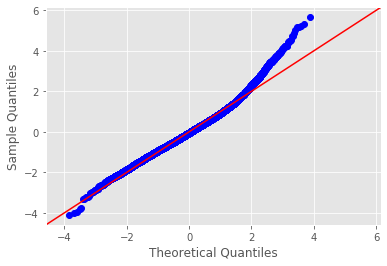

In [108]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [109]:
# Removing outliers
# OR Logtransformation, but be careful on how it impacts your coefficients
# look at P-Value <.05
# Get R-Squared closered to .8

# Define the problem
# outcome = 'price'
# x_cols = ['yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_above',
#           'sqft_basement', 'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'grade', 'view']
# for col in x_cols:
#     df_clean[col] = (df_clean[col] - df_clean[col].mean())/df_clean[col].std()
# df_clean.head()

### Homoscedasticity

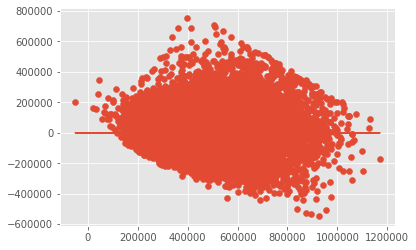

In [110]:
plt.scatter(model.predict(df_clean[x_cols]), model.resid)
plt.plot(model.predict(df_clean[x_cols]), [0 for i in range(len(df_clean))])
# Further work with outliers could be warranted.
# Take a look at the outliers in the columns before hand

In [ ]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df_clean['price'].quantile(q=q)))

#### Removing some residuals ???

In [ ]:
# Cleaning more of the data to remove some of the outliers here
subset = df_clean[df_clean['price'] < 2000000]
print('Percent removed:',(len(df_clean) - len(subset))/len(df_clean))
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])